
# BMIS-2542: Data Programming with Python 
##### Katz Graduate School of Business, Fall 2019

## Session-8: Predictive Modeling - Classification
***

Machine learning provides a unified framework to learn from data and predict outcomes. <br>
Classification is a typical machine learning task that **aims to predict categorical outcomes**  (i.e., as opposed to predicting numeric outcome). <br>
Various classification scenarios arise in different application domains; e.g., spam e-mail filters, desease detection, fraud detection, image recognition, etc. 

* $m$ samples/instances/data points/observations: $x^{(1)},...,x^{(m)}$ 
* $n$ features/input variables/independent variables: $X_1,...,X_n$
* Output variable/dependent variable/response variable/label: $Y$
* **Goal**: estimate a mapping $\tilde{Y}=h(X)$

### Understanding Class Predictions

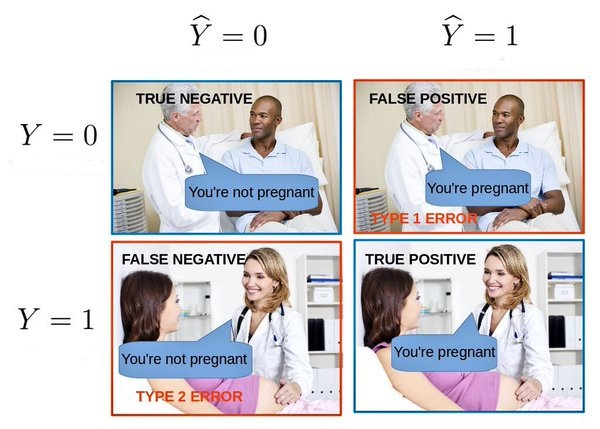

### Model Evaluation - The Confusion Matrix
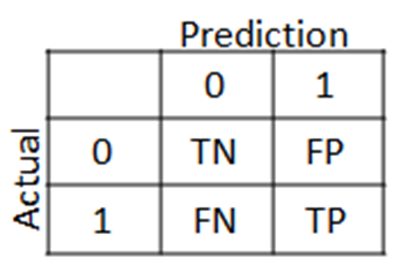

 - **True Positive (TP)**: A Positive correctly identified as a Positive 
 - **True Negative (TN)**: A Negative correctly identified as a Negative 
 - **False Positive (FP)**: A Negative incorrectly identified as a Positive 
 - **False Negative (FN)**: A Positive incorrectly identified as a Negative 
 
#### Evaluation Metrics 
 - **Accuracy**: `(TP + TN)/(TP + TN + FP + FN)`<br>
 - **Precision**: `TP/(TP + FP)`<br>
 - **Recall (Sensitivity)**: `TP/(TP + FN)` (**Specificity:** `TN / (TN + FP)`)<br>
 - **F1-Score**: `2[(Precision * Recall) / (Precision + Recall)]`<br>

### <mark>Exercise</mark>
Imagine a study evaluating a new test (i.e., predictive model) that screens people for a disease. Each person taking the test either has or does not have the disease. The test outcome can be positive (classifying the person as having the disease) or negative (classifying the person as not having the disease). <br>
1. Explain `TP`, `TN`, `FP`, and `FN` in the context of this study.
2. `100` people participated in this study and `40` of them actually had the disease. The test screened `45` people as having the decease while only `35` of them actually had the decease. Compute the accuracy, precision, recall, and F1 score for this predictive model.

The [Scikit-Learn](https://scikit-learn.org/stable/index.html) module provides a comprehensive toolkit to perform machine learning tasks with Python.<br>
Read Scikit-Learn's Supervised Learning/Classification tutorial [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools

import matplotlib.pylab as plt
%matplotlib inline 

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import preprocessing

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# confusion matrix example - binary classification (2 classes). Note the positions of TN, FP, FN, TP
y_true = [0, 1, 0, 1]; #ground truth real outcome
y_predicted = [1, 1, 1, 0]; #
cm = confusion_matrix(y_true,y_predicted)
cm

array([[0, 2],
       [1, 1]], dtype=int64)

In [3]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

### Training a Binary Classifier

In this notebook, we will use the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://goo.gl/U2Uwz2) from [Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).<br>

This dataset contains various information about breast cancer tumors, along with their associated class labels - **malignant or benign**.

  * **2 Classes**: Malignant or Benign
  * **569 instances** (i.e, observations) where each instance represents a breast cancer tumor
  * **30 features or attributes** such as the radius of the tumor, texture, smoothness, compactness, and area
  * Missing Attributes: None

**Our Goal**: Using this dataset, we will build a machine learning model that uses the features to predict whether a tumor is malignant or benign.

We will use the following function later to visualize a confusion matrix. Read the original [article](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) here.

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
data_bc = datasets.load_breast_cancer()
print(data_bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
type(data_bc)

sklearn.utils.Bunch

In [7]:
print(data_bc.target_names)
print(data_bc.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
df_bc = pd.DataFrame(data = data_bc.data, columns=data_bc.feature_names)
df_bc['outcome'] = data_bc.target
print(df_bc.shape)
df_bc.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [10]:
df_bc.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
outcome                    0
dtype: int64

In [11]:
df_bc['outcome'].value_counts()

1    357
0    212
Name: outcome, dtype: int64

### Creating Training and Test Datasets
Learning the parameters of a prediction function and testing it on the same data would lead to overfitting. In other words, a model that would just repeat the labels of the samples that it has seen before would have a perfect score but would fail to predict anything useful on yet-unseen data. To avoid it, it is common practice to hold out part of the available data as a test set.

In [12]:
X = df_bc.iloc[:, 0:30].values # .values converts the DataFrame into the NumPy representation

In [13]:
print(X.shape)
print(type(X))

(569, 30)
<class 'numpy.ndarray'>


In [14]:
Y = df_bc.iloc[:, 30].values

In [15]:
print(Y.shape)
print(type(Y))

(569,)
<class 'numpy.ndarray'>


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


In [17]:
# check class balance
unique_elements, counts_elements = np.unique(Y_train, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[158 268]


### Feature Scaling
Feature scaling through standardization can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.
Read about the importance of feature scaling [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

In [18]:
from sklearn.preprocessing import StandardScaler;#normalising mean sd is computed abd scaling is perforemd

sc = StandardScaler()
X_train = sc.fit_transform(X_train); #fit transform on training data...we scale the variable using scaling on training set 
X_test = sc.transform(X_test)

### Classification Algorithms

We use a classification algorithm that learns the training set to predict the class membership.
Once the model is trained, we can evaluate the prediction performance of the model, using the test set.<br>

There are many classification algorithms available for supervised learning, and each algorithm has its own strengths and weaknesses. In this notebook, we will use several classification algorithms that usually perform well for binary classification. [Supervised Learning with Scikit-Learn](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) is a good read to understand how these algorithms work.


#### K-Nearest Neighbors
A new data point (i.e., instance) is assigned to the class most common among its **K** nearest data points (i.e., neighbors).<br>
When k = 1, then the new data point is assigned to the class of that single nearest neighbor.
![KNN](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform') # initialize a KNN classifier
knn.fit(X_train, Y_train) # train classifer with training set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Model Evaluation - Confusion Matrix
Read more about Scikit learn's confusion matrix [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), and the classification report [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report).

In [20]:
Y_train_predicted = knn.predict(X_train)

In [21]:
print("Training Classification accuracy:", knn.score(X_train, Y_train)); #accuracy
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(Y_train, Y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(Y_train, Y_train_predicted)) #report we use training set which is not right so we get 100%accuracy

Training Classification accuracy: 1.0


Training Confusion matrix: 
[[158   0]
 [  0 268]]


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       268

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [22]:
Y_test_predicted = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(Y_test, Y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(X_test,Y_test))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test, Y_test_predicted))

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.951048951048951


Test Confusion matrix: 
[[50  4]
 [ 3 86]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.96      0.97      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



Confusion matrix, without normalization
[[50  4]
 [ 3 86]]


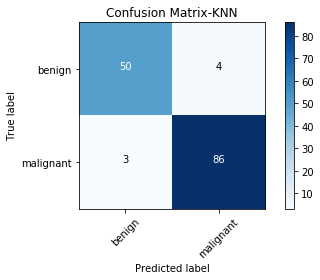

In [23]:
# Let's visualize the confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix_knn, classes=['benign','malignant'],
                      title='Confusion Matrix-KNN')
plt.show()

### Annotations for the Confusion Matrix
* **True Positives (TP)**: The model correctly predicted the tumor as malignant when it was indeed malignant 
* **True Negatives (TN)**: The model correctly predicted the tumor as benign when it was indeed benign 
* **False Positives(FP)**: The model incorrectly predicted the tumor as malignant when it was indeed benign 
* **False Negatives(FN)**: The model incorrectly predicted the tumor as benign when it was indeed malignant

### Model Evaluation - ROC Curve
The **[Receiver Operating Characteristic (ROC) curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)** typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. While this is not very realistic, it does mean that a larger area under the curve (AUC) is usually better.It is also the better choice for model evaluation when classes are imbalanced.

In [24]:
# print the first 10 predicted responses
knn.predict(X_test)[0:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [25]:
# print the first 10 predicted probabilities of class membership
knn.predict_proba(X_test)[0:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [26]:
# print the first 10 predicted probabilities for class 1
knn.predict_proba(X_test)[0:10, 1]

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1.])

In [27]:
# store the predicted probabilities for class 1
Y_pred_prob = knn.predict_proba(X_test)[:, 1]

Area Under the Curve (AUC):
 0.9461090303786934


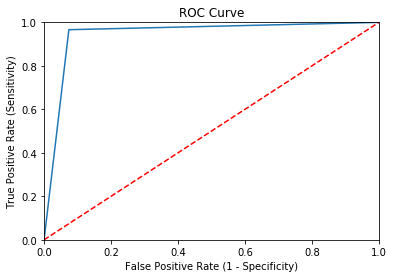

In [28]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area Under the Curve (AUC):\n", roc_auc_score(Y_test, Y_pred_prob))
#higher AUC indicates better classifier

### Tuning Hyperparameters

Let's increase the neighborhood region to a larger **K** and see if the prediction gets better.<br>
Likewise, other hyperparameters also can be tuned (e.g., `weights = distance`).

In [29]:
for i in range (1,6):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform') # initialize a KNN classifier
    knn.fit(X_train, Y_train)
    
    Y_pred_prob = knn.predict_proba(X_test)[:, 1]
    
    print("{0} Neighbors-UNIFORM".format(i))
    print('--------------------')
    print("Accuracy:",knn.score(X_test,Y_test))
    print("F1:",f1_score(Y_test,knn.predict(X_test),average='weighted'))
    print("ROC Curve AUC:", roc_auc_score(Y_test, Y_pred_prob)); #area of the curve 
    print()

1 Neighbors-UNIFORM
--------------------
Accuracy: 0.951048951048951
F1: 0.95095694260316
ROC Curve AUC: 0.9461090303786934

2 Neighbors-UNIFORM
--------------------
Accuracy: 0.951048951048951
F1: 0.95113521734576
ROC Curve AUC: 0.964835622138993

3 Neighbors-UNIFORM
--------------------
Accuracy: 0.958041958041958
F1: 0.958041958041958
ROC Curve AUC: 0.9816895547232626

4 Neighbors-UNIFORM
--------------------
Accuracy: 0.965034965034965
F1: 0.9650965838184001
ROC Curve AUC: 0.9869954223886808

5 Neighbors-UNIFORM
--------------------
Accuracy: 0.958041958041958
F1: 0.958041958041958
ROC Curve AUC: 0.9856429463171037



In [30]:
# let's keep the best model
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform') 
knn.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state = 42)
logit.fit(X_train, Y_train)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
rn_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rn_forest.fit(X_train, Y_train)

#### SVM Models

In [ ]:
from sklearn.svm import SVC
svc_linear = SVC(kernel = 'linear', probability= True, random_state = 42)
svc_linear.fit(X_train, Y_train) 

In [ ]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', probability= True, random_state = 42)
svc_rbf.fit(X_train, Y_train)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_tree.fit(X_train, Y_train)

### Model Evaluation

In [ ]:
for model in (knn,logit,nb,rn_forest,svc_linear,svc_rbf,d_tree):
    print(model)
    print('---------------------------------------------')
    print("Accuracy:", model.score(X_test,Y_test))    
    print("F1:",f1_score(Y_test,model.predict(X_test),average='weighted'))
    print("ROC Curve AUC:", roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))
    print("\n")
    print("Classification Report:\n",classification_report(Y_test, model.predict(X_test)))
    print()

### Cross Validation

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. Thus, knowledge about the test set can leak into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.<br>

As partitioning the available data into three sets, drastically reduces the number of samples which can be used for learning the model, a procudure called `cross validation` is used. In the basic approach, called `k-fold cross validation`, the training set is split into `k` smaller sets (k folds), a model is trained using `k-1` of the folds as training data, and the resulting model is validated on the remaining part of the data.

Read more about scikit learn's cross valiadation procedures [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

In [ ]:
knn_cv = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn_cv.fit(X_train, Y_train)

In [ ]:
scores_accuracy =  cross_val_score(knn_cv, X_train, Y_train, cv=3, scoring = 'accuracy')
scores_accuracy

In [ ]:
scores_accuracy.mean()

In [ ]:
scores_f1_macro =  cross_val_score(knn_cv, X_train, Y_train, cv=3, scoring = 'f1_macro')
scores_f1_macro

In [ ]:
scores_f1_macro.mean() # Mean f1 score

In [ ]:
metrics = ['f1_macro', 'precision_macro', 'recall_macro', ]
scores_multiple = cross_validate(knn_cv, X_train, Y_train, cv=3, scoring = metrics)
sorted(scores_multiple.keys())  \

In [ ]:
print('Avg. Precision:', scores_multiple['test_precision_macro'].mean())   
print('Avg. Recall:', scores_multiple['test_recall_macro'].mean())    
print('Avg. f1:', scores_multiple['test_f1_macro'].mean())   

#### Extra Reading:
[Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)